In [1]:
# Importando bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Configuração do estilo dos gráficos
sns.set_theme(style="darkgrid")

In [6]:
# Carregando o dataset
file_path = "/content/Most_Streamed_Spotify_Songs_2024.csv"
df = pd.read_csv(file_path, encoding='latin1')

Foi necessário usar o 'encoding' pois estava com o erro "UnicodeDecodeError: 'utf-8' codec can't decode byte 0xfd in position 2679: invalid start byte"

In [8]:
# Primeiras linhas do dataset
display(df.head())

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,QM24S2402528,1,725.4,"390,470,936","30,716","196,631,588",...,684,62.0,"17,598,718",114.0,"18,004,655","22,931","4,818,457","2,669,262",NaN,0
1,Not Like Us,Not Like Us,Kendrick Lamar,5/4/2024,USUG12400910,2,545.9,"323,703,884","28,113","174,597,137",...,3,67.0,"10,422,430",111.0,"7,780,028","28,444","6,623,075","1,118,279",NaN,1
2,i like the way you kiss me,I like the way you kiss me,Artemas,3/19/2024,QZJ842400387,3,538.4,"601,309,283","54,331","211,607,669",...,536,136.0,"36,321,847",172.0,"5,022,621","5,639","7,208,651","5,285,340",NaN,0
3,Flowers,Flowers - Single,Miley Cyrus,1/12/2023,USSM12209777,4,444.9,"2,031,280,633","269,802","136,569,078",...,"2,182",264.0,"24,684,248",210.0,"190,260,277","203,384",NaN,"11,822,942",NaN,0
4,Houdini,Houdini,Eminem,5/31/2024,USUG12403398,5,423.3,"107,034,922","7,223","151,469,874",...,1,82.0,"17,660,624",105.0,"4,493,884","7,006","207,179","457,017",NaN,1


In [9]:
# Informações gerais do dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Track                       4600 non-null   object 
 1   Album Name                  4600 non-null   object 
 2   Artist                      4595 non-null   object 
 3   Release Date                4600 non-null   object 
 4   ISRC                        4600 non-null   object 
 5   All Time Rank               4600 non-null   object 
 6   Track Score                 4600 non-null   float64
 7   Spotify Streams             4487 non-null   object 
 8   Spotify Playlist Count      4530 non-null   object 
 9   Spotify Playlist Reach      4528 non-null   object 
 10  Spotify Popularity          3796 non-null   float64
 11  YouTube Views               4292 non-null   object 
 12  YouTube Likes               4285 non-null   object 
 13  TikTok Posts                3427 

In [10]:
# Estatísticas descritivas
display(df.describe())

,Track Score,Spotify Popularity,Apple Music Playlist Count,Deezer Playlist Count,Amazon Playlist Count,TIDAL Popularity,Explicit Track
count,4600.000000,3796.000000,4039.00000,3679.000000,3545.000000,0.0,4600.000000
mean,41.844043,63.501581,54.60312,32.310954,25.348942,NaN,0.358913
std,38.543766,16.186438,71.61227,54.274538,25.989826,NaN,0.479734
min,19.400000,1.000000,1.00000,1.000000,1.000000,NaN,0.000000
25%,23.300000,61.000000,10.00000,5.000000,8.000000,NaN,0.000000
50%,29.900000,67.000000,28.00000,15.000000,17.000000,NaN,0.000000
75%,44.425000,73.000000,70.00000,37.000000,34.000000,NaN,1.000000
max,725.400000,96.000000,859.00000,632.000000,210.000000,NaN,1.000000


In [11]:
# Verificar valores nulos
print(df.isnull().sum())

Track                            0
Album Name                       0
Artist                           5
Release Date                     0
ISRC                             0
All Time Rank                    0
Track Score                      0
Spotify Streams                113
Spotify Playlist Count          70
Spotify Playlist Reach          72
Spotify Popularity             804
YouTube Views                  308
YouTube Likes                  315
TikTok Posts                  1173
TikTok Likes                   980
TikTok Views                   981
YouTube Playlist Reach        1009
Apple Music Playlist Count     561
AirPlay Spins                  498
SiriusXM Spins                2123
Deezer Playlist Count          921
Deezer Playlist Reach          928
Amazon Playlist Count         1055
Pandora Streams               1106
Pandora Track Stations        1268
Soundcloud Streams            3333
Shazam Counts                  577
TIDAL Popularity              4600
Explicit Track      

In [13]:
# Remover duplicatas, se existirem
print("\n Valores duplicados no dataset:", df.duplicated().sum())
df = df.drop_duplicates()


 Valores duplicados no dataset: 2


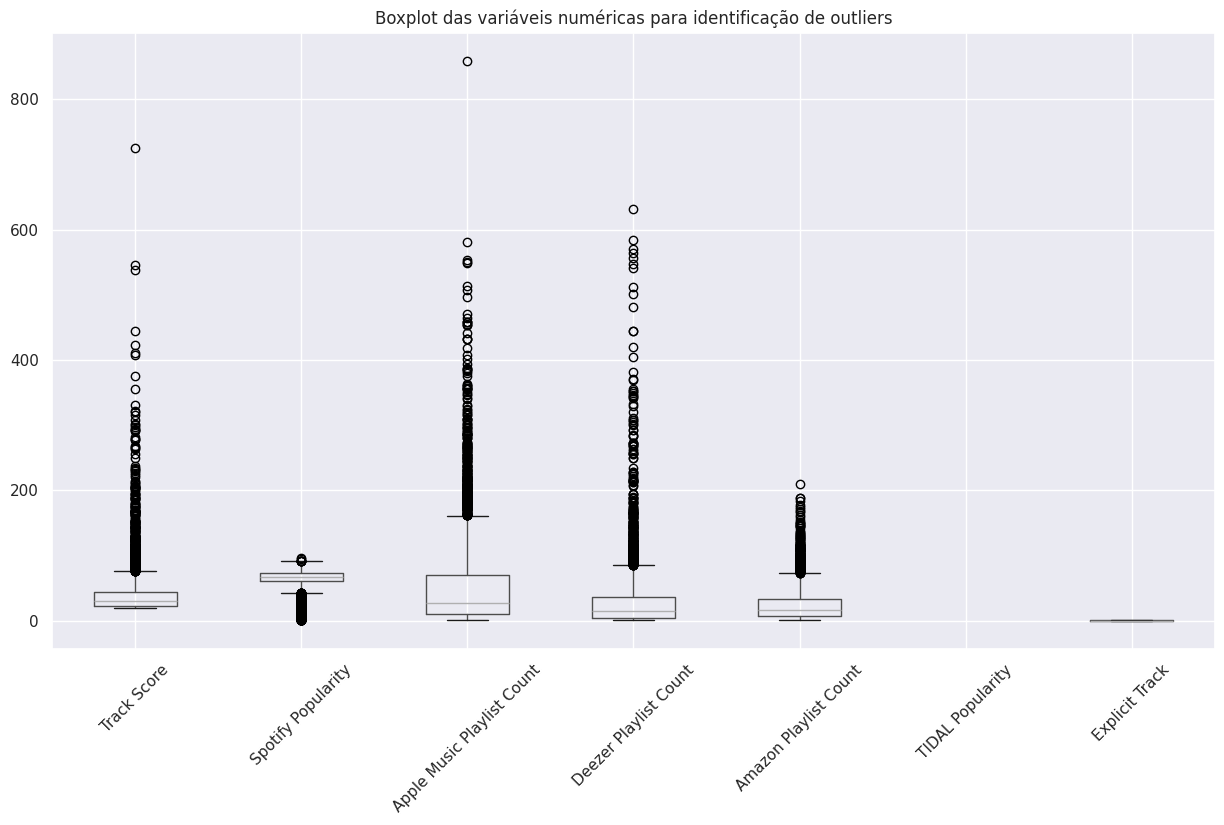

In [15]:
# Análise de Outliers usando Boxplots
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(15, 8))
df[numerical_cols].boxplot()
plt.xticks(rotation=45)
plt.title("Boxplot das variáveis numéricas para identificação de outliers")
plt.show()

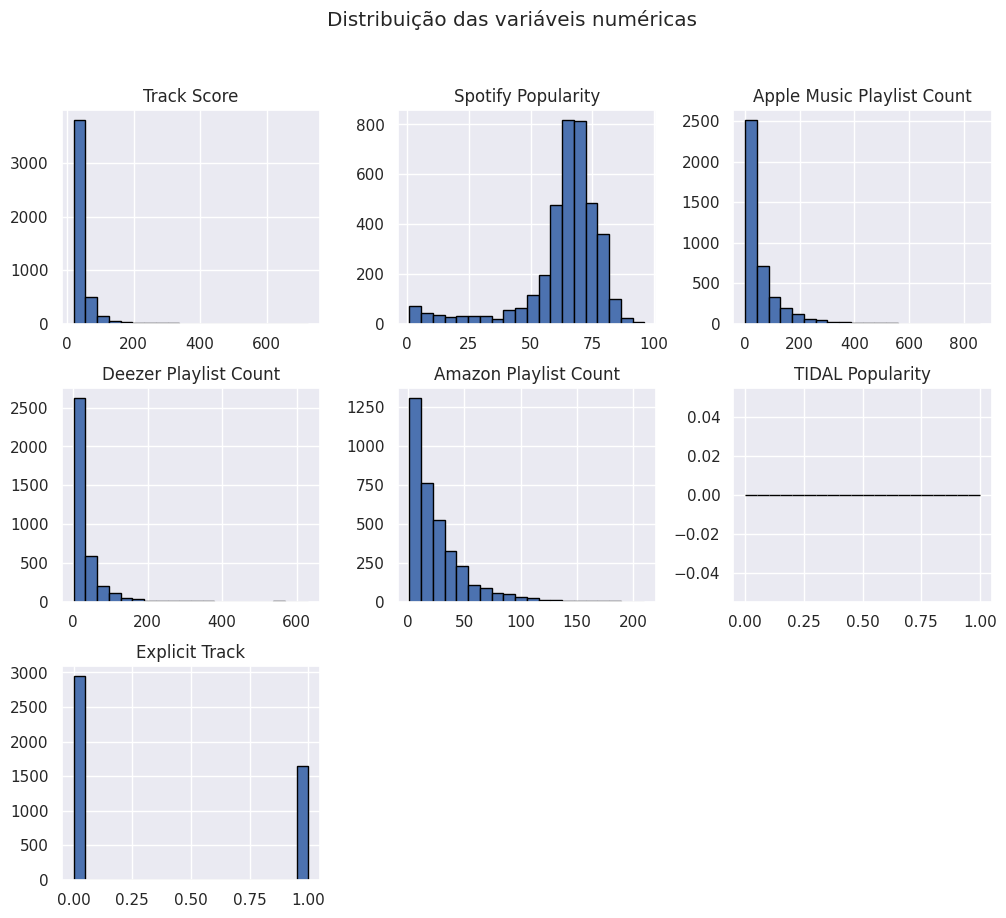

In [16]:
# Distribuição das variáveis numéricas
df[numerical_cols].hist(figsize=(12, 10), bins=20, edgecolor='black')
plt.suptitle("Distribuição das variáveis numéricas")
plt.show()

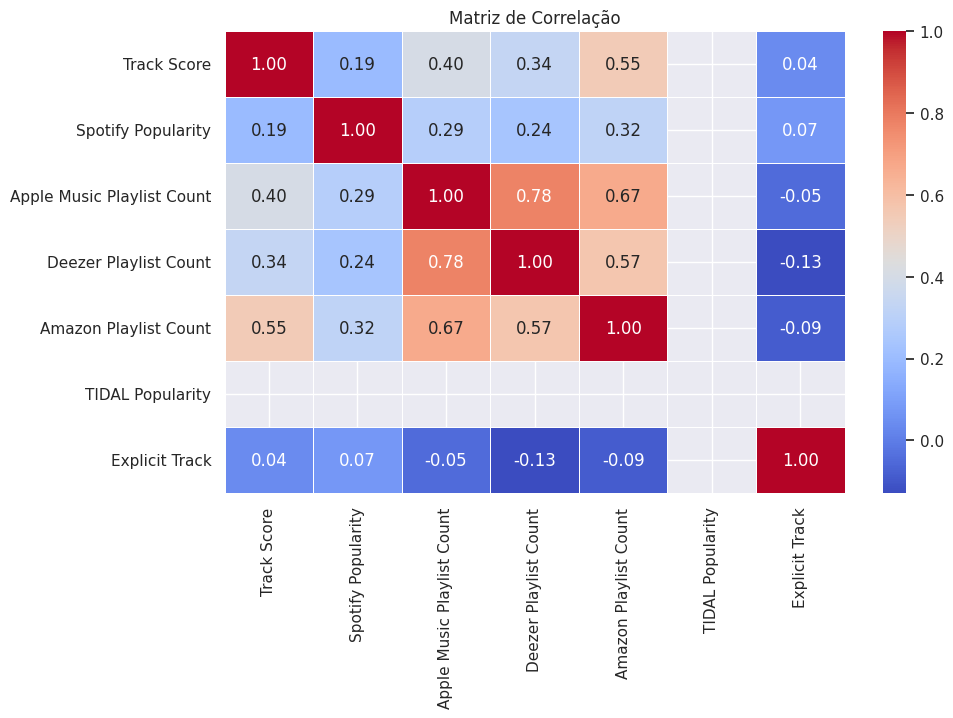

In [17]:
# Matriz de correlação
plt.figure(figsize=(10, 6))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlação")
plt.show()

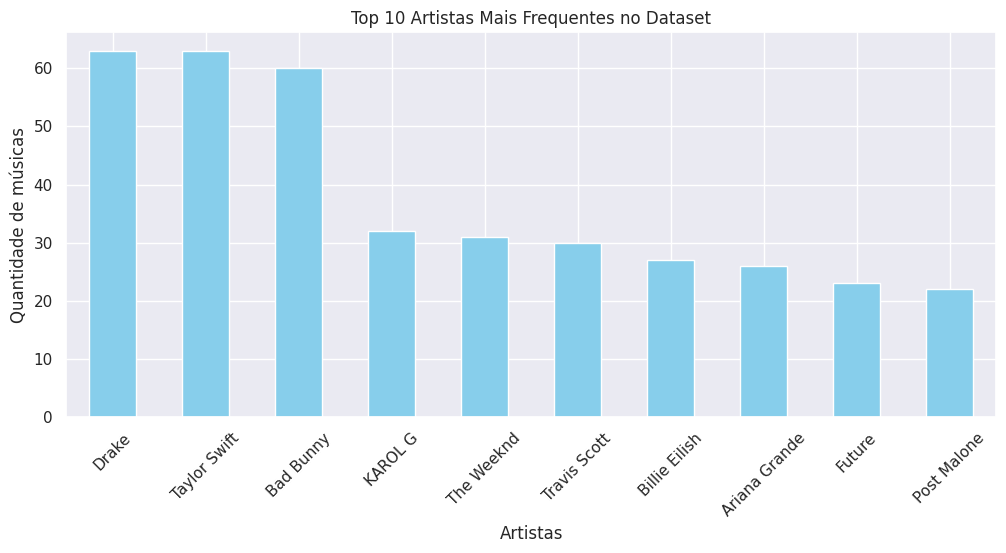

In [20]:
# Top 10 artistas mais presentes
plt.figure(figsize=(12, 5))
df['Artist'].value_counts().head(10).plot(kind='bar', color='skyblue')
plt.title("Top 10 Artistas Mais Frequentes no Dataset")
plt.ylabel("Quantidade de músicas")
plt.xlabel("Artistas")
plt.xticks(rotation=45)
plt.show()

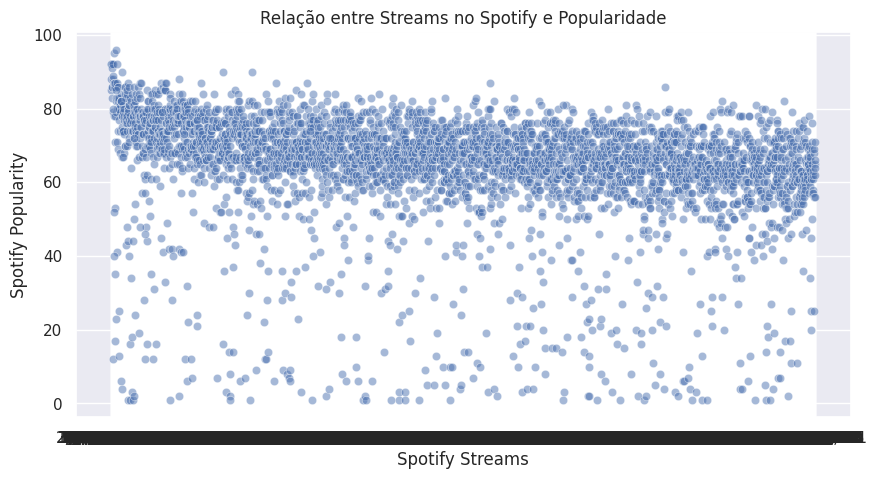

In [28]:
# Relação entre Popularidade e Streams do Spotify
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='Spotify Streams', y='Spotify Popularity', alpha=0.5)
plt.title("Relação entre Streams no Spotify e Popularidade")
plt.xlabel("Spotify Streams")
plt.ylabel("Spotify Popularity")
plt.show()

O eixo X do gráfico que relaciona Streams e Popularidade no Spotify indica que, quanto mais à direita um ponto estiver, maior é o número de streams da música.